# **Delta-X Workshop**

## **Module 2: Sediment Accretion Using Feldspar**

Data Access:
> https://daac.ornl.gov/DELTAX/guides/DeltaX_Feldspar_Sediment.html

Citations:
> Twilley, R., A. Fontenot-Cassaway, and A. Rovai. 2021. Delta-X: Feldspar Sediment Accretion Measurements for Coastal Wetlands, MRD, LA, USA. ORNL DAAC, Oak Ridge, Tennessee, USA. https://doi.org/10.3334/ORNLDAAC/1998


Authors:


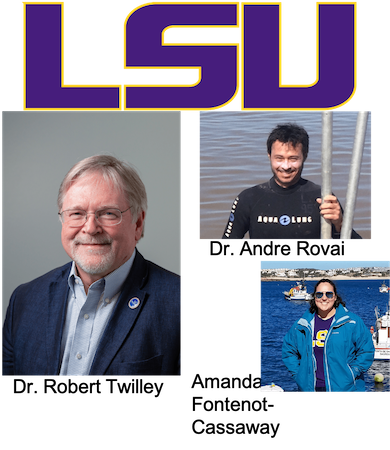

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

#For access to Google Drive files
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#For saving to Google Drive
from google.colab import drive

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
Gdrive = GoogleDrive(gauth)

drive.mount('/content/drive',force_remount=True)



Mounted at /content/drive


Let's start by getting an idea of where these field sites are located. There are 4 sites in Atchafalaya , which is a sediment-rich basin:

    Mike Island is a deltaic freshwater site

    CRMS 2568 is a forest freshwater site

    CRMS0339 is a brackish marsh site

    CRMS0322 is a saline marsh site

There are 3 sites in Terrebonne, which is a seidment-poor basin :

    CRMS0294 is a freshwater marsh site

    CRMS0396 is a brackish marsh site

    CRMS0421 is a saline marsh site


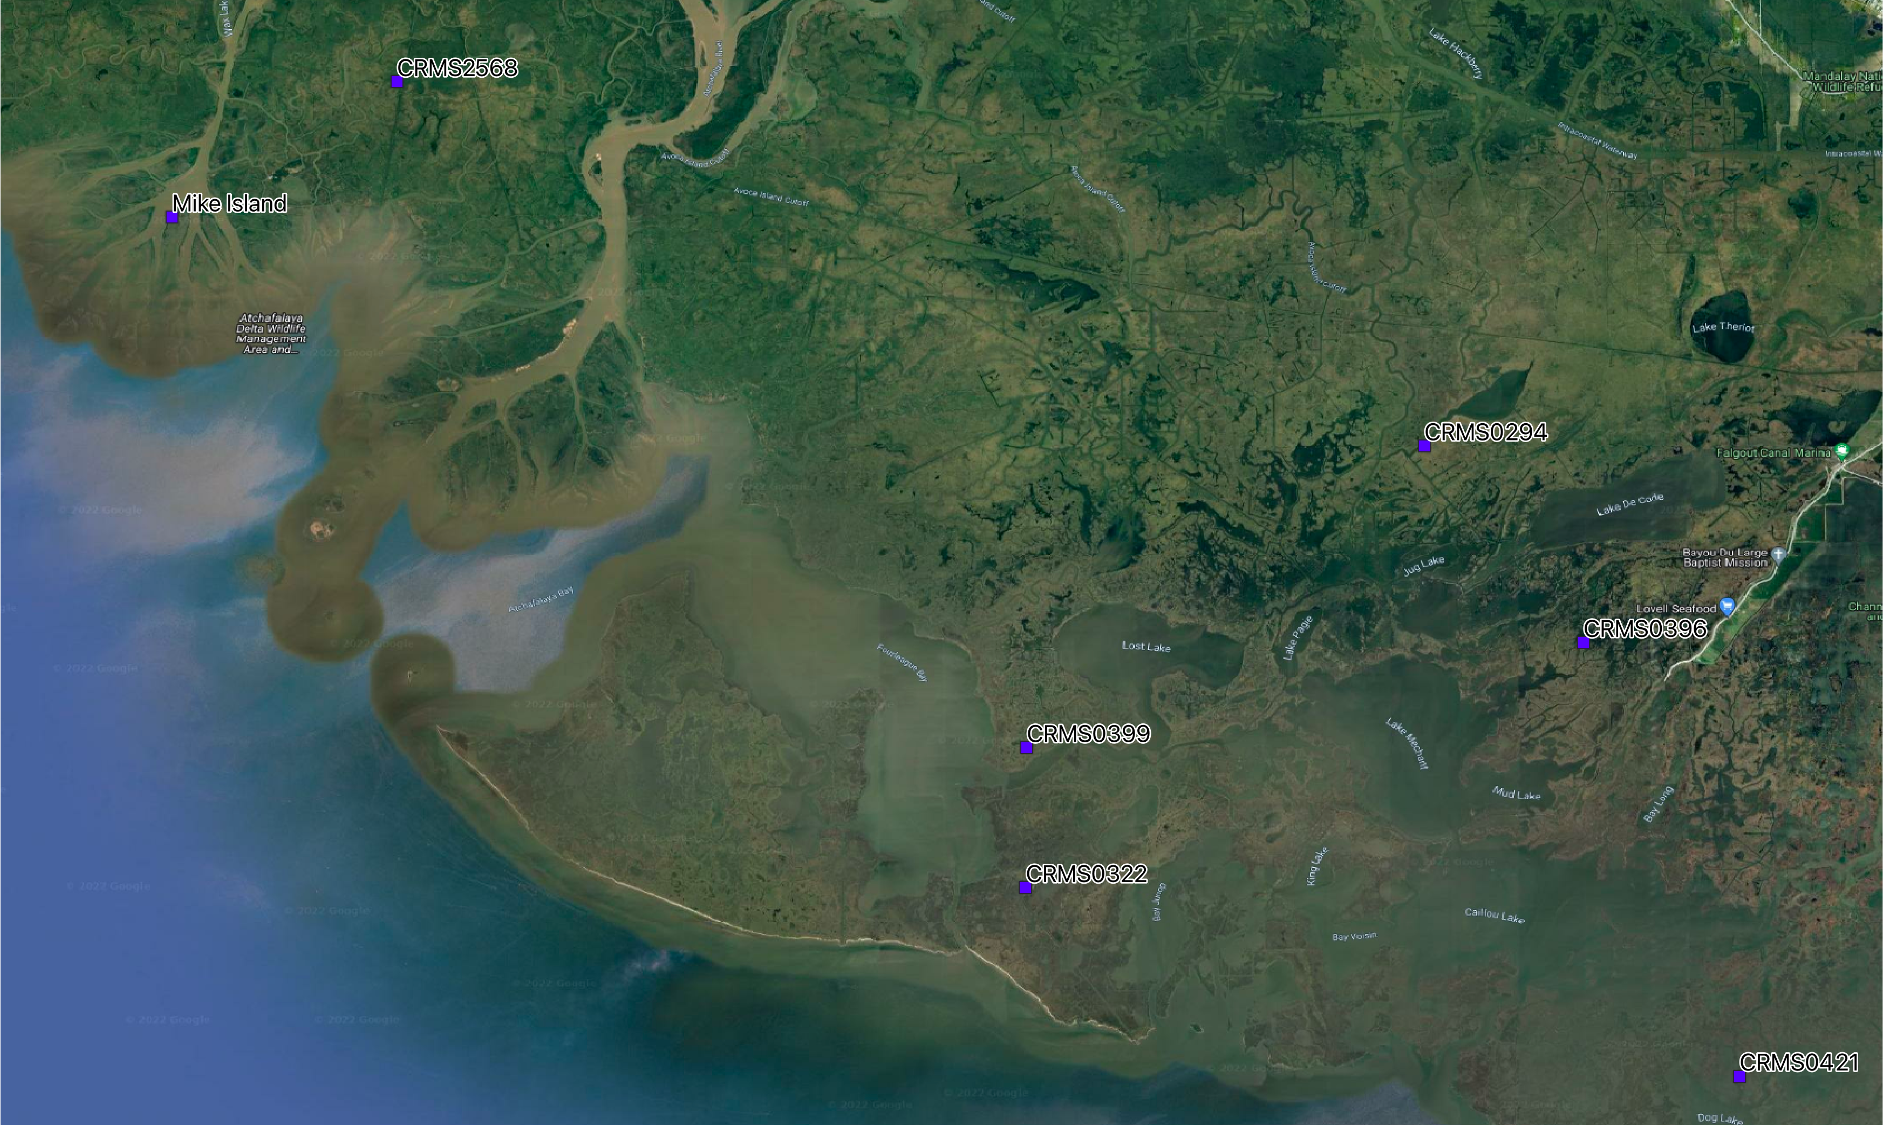

Let's start by loading the accretion file.

In [5]:
input_dir = '/content/drive/My Drive/Modules/Field/'
sed_file = pd.read_csv(input_dir + "/DeltaX_Feldspar_Sediment_1998/data/DeltaX_Feldspar_Fall2020_Spring2021.csv")

sed_file = sed_file.replace('not collected',np.nan)
sed_file = sed_file.astype({'elevation_navd88':'float','normalized_accretion':'float','soil_bulk_density':'float','soil_organic_matter_content':'float','soil_organic_carbon':'float','soil_organic_carbon_density':'float'})

sed_file.head()

basin   campaign    site_id hydrogeomorphic_zone  elevation_navd88  \
0  Atchafalaya  Fall_2020  CRMS_2568           supratidal             0.554   
1  Atchafalaya  Fall_2020  CRMS_2568           supratidal             0.554   
2  Atchafalaya  Fall_2020  CRMS_2568           supratidal             0.554   
3  Atchafalaya  Fall_2020  CRMS_2568           supratidal             0.554   
4  Atchafalaya  Fall_2020  CRMS_2568           supratidal             0.554   

    latitude  longitude station plot replicate  ... time_marker_deployed  \
0  29.564256 -91.354892     T25    X         A  ...     10/17/2019 12:00   
1  29.564256 -91.354892     T25    X         B  ...     10/17/2019 12:00   
2  29.564256 -91.354892     T25    Y         A  ...     10/17/2019 12:00   
3  29.564256 -91.354892     T25    Y         B  ...     10/17/2019 12:00   
4  29.564256 -91.354892     T25    Z         A  ...     10/17/2019 12:00   

  time_marker_sampled sediment_accretion  \
0    11/10/2020 12:00                 11   
1    11/10/2020 12:00                  7   
2    11/10/2020 12:00                 12   
3    11/10/2020 12:00                 10   
4    11/10/2020 12:00                 14   

   days_between_sampling_and_deployment  normalized_accretion  \
0                                   390                  10.0   
1                                   390                   7.0   
2                                   390                  11.0   
3                                   390                   9.0   
4                                   390                  13.0   

   soil_bulk_density  soil_organic_matter_content  soil_organic_carbon  \
0              0.037                          NaN                  NaN   
1              0.073                          NaN                  NaN   
2              0.047                          NaN                  NaN   
3              0.069                          NaN                  NaN   
4              0.026                          NaN                  NaN   

   soil_organic_carbon_density  Unnamed: 20  
0                          NaN          NaN  
1                          NaN          NaN  
2                          NaN          NaN  
3                          NaN          NaN  
4                          NaN          NaN  

[5 rows x 21 columns]

Let's start by find average values of each variable (accretion rate, bulk density, organic matter content and organic carbon content) for each site and hydrogeomorphic zone.

These accretion values represent the net deposition of material on top of a feldspar marker horizon over approximately 1 year.

In [6]:
sed_means = sed_file.groupby(['site_id','hydrogeomorphic_zone'])[['elevation_navd88','normalized_accretion','soil_bulk_density','soil_organic_matter_content','soil_organic_carbon','soil_organic_carbon_density']].agg(np.nanmean)
sed_stds = sed_file.groupby(['site_id','hydrogeomorphic_zone'])[['elevation_navd88','normalized_accretion','soil_bulk_density','soil_organic_matter_content','soil_organic_carbon','soil_organic_carbon_density']].agg(np.std)
sed_count = sed_file.groupby(['site_id','hydrogeomorphic_zone'])[['elevation_navd88','normalized_accretion','soil_bulk_density','soil_organic_matter_content','soil_organic_carbon','soil_organic_carbon_density']].agg(np.count_nonzero)

sed_means

elevation_navd88  normalized_accretion  \
site_id   hydrogeomorphic_zone                                           
CRMS_0294 intertidal                    0.254500             19.900000   
CRMS_0322 intertidal                    0.131500             14.708333   
CRMS_0396 intertidal                    0.095000             15.960000   
          subtidal                           NaN             98.714286   
CRMS_0399 intertidal                    0.189000             13.041667   
          subtidal                           NaN             41.750000   
CRMS_0421 intertidal                    0.009760             31.480000   
          subtidal                           NaN             41.923077   
CRMS_2568 supratidal                    0.442000             21.000000   
WLD_T1    subtidal                     -0.110357             51.357143   
          supratidal                    0.482000             40.333333   
WLD_T3    intertidal                    0.249000             93.733333   
          subtidal                     -0.230182             39.772727   

                                soil_bulk_density  \
site_id   hydrogeomorphic_zone                      
CRMS_0294 intertidal                     0.031633   
CRMS_0322 intertidal                     0.185625   
CRMS_0396 intertidal                     0.080040   
          subtidal                       0.104286   
CRMS_0399 intertidal                     0.270667   
          subtidal                       0.125182   
CRMS_0421 intertidal                     0.150840   
          subtidal                       0.189846   
CRMS_2568 supratidal                     0.053556   
WLD_T1    subtidal                       0.273107   
          supratidal                     0.574467   
WLD_T3    intertidal                     0.655467   
          subtidal                       0.770591   

                                soil_organic_matter_content  \
site_id   hydrogeomorphic_zone                                
CRMS_0294 intertidal                              73.113333   
CRMS_0322 intertidal                              33.066667   
CRMS_0396 intertidal                              40.236000   
          subtidal                                      NaN   
CRMS_0399 intertidal                              24.208333   
          subtidal                                      NaN   
CRMS_0421 intertidal                              23.120000   
          subtidal                                      NaN   
CRMS_2568 supratidal                                    NaN   
WLD_T1    subtidal                                 8.564286   
          supratidal                              10.560000   
WLD_T3    intertidal                               6.900000   
          subtidal                                 4.754545   

                                soil_organic_carbon  \
site_id   hydrogeomorphic_zone                        
CRMS_0294 intertidal                      35.893333   
CRMS_0322 intertidal                      13.566667   
CRMS_0396 intertidal                      17.528000   
          subtidal                              NaN   
CRMS_0399 intertidal                       9.466667   
          subtidal                              NaN   
CRMS_0421 intertidal                       8.920000   
          subtidal                              NaN   
CRMS_2568 supratidal                            NaN   
WLD_T1    subtidal                         2.603571   
          supratidal                       3.460000   
WLD_T3    intertidal                       1.593333   
          subtidal                         1.072727   

                                soil_organic_carbon_density  
site_id   hydrogeomorphic_zone                               
CRMS_0294 intertidal                               0.011400  
CRMS_0322 intertidal                               0.024125  
CRMS_0396 intertidal                               0.012640  
          subtidal                         

We can compare accretion rates by plotting these averages.

[(0.0, 100.0),
 Text(0, 0.5, 'Soil Organic Matter (% dry mass)'),
 Text(0.5, 0, 'Site')]

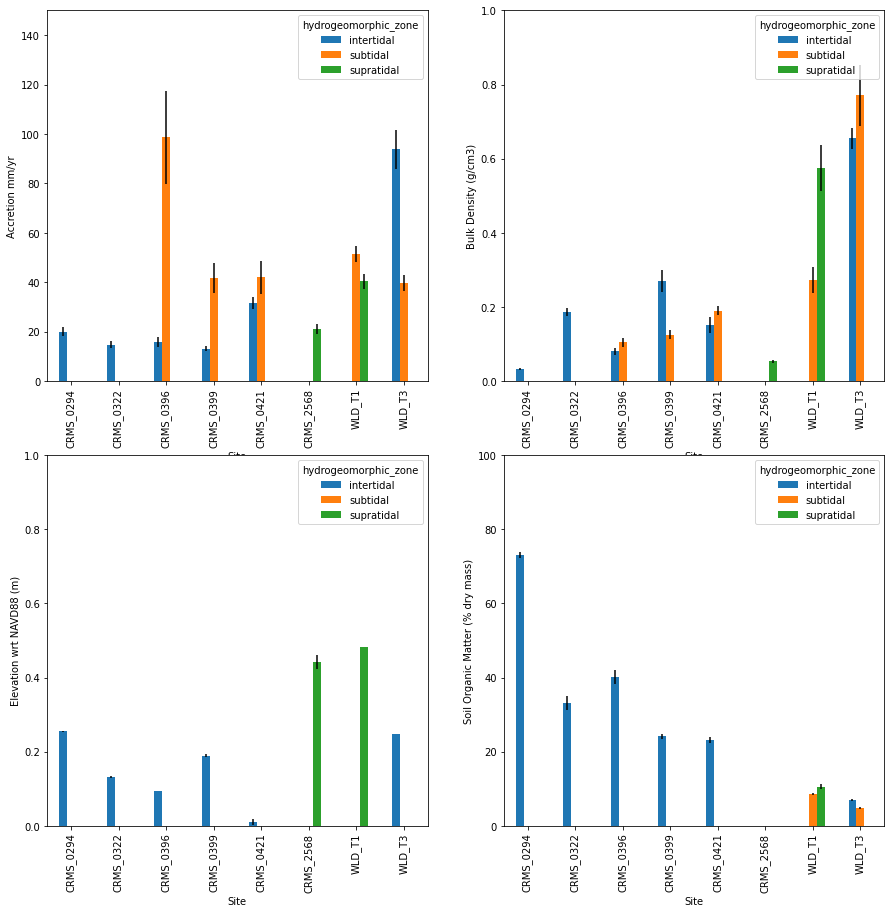

In [7]:
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(ncols=2,nrows=2, figsize=(15,15))
sed_means.unstack()['normalized_accretion'].plot(kind='bar', stacked=False,ax = ax1,yerr = sed_stds.unstack()['normalized_accretion']/(np.sqrt(sed_count.unstack()['normalized_accretion'])))
ax1.set(xlabel='Site', ylabel='Accretion mm/yr',ylim=[0,150])

sed_means.unstack()['soil_bulk_density'].plot(kind='bar', stacked=False,ax = ax2,yerr = sed_stds.unstack()['soil_bulk_density']/(np.sqrt(sed_count.unstack()['soil_bulk_density'])))
ax2.set(xlabel='Site', ylabel='Bulk Density (g/cm3)',ylim=[0,1])

sed_means.unstack()['elevation_navd88'].plot(kind='bar', stacked=False,ax = ax3,yerr = sed_stds.unstack()['elevation_navd88']/(np.sqrt(sed_count.unstack()['elevation_navd88'])))
ax3.set(xlabel='Site', ylabel='Elevation wrt NAVD88 (m)',ylim=[0,1])

sed_means.unstack()['soil_organic_matter_content'].plot(kind='bar', stacked=False,ax = ax4,yerr = sed_stds.unstack()['soil_organic_matter_content']/(np.sqrt(sed_count.unstack()['soil_organic_matter_content'])))
ax4.set(xlabel='Site', ylabel='Soil Organic Matter (% dry mass)',ylim=[0,100])



If each of these marshes maintains these accretion rates, how much sea level rise can they withstand between they are inundated.



In [33]:
sed_means2 = sed_file.groupby(['site_id'])[['elevation_navd88','normalized_accretion']].agg(np.nanmean)
accretion = sed_means2.reset_index()
accretion

site_id  elevation_navd88  normalized_accretion
0  CRMS_0294          0.254500             19.900000
1  CRMS_0322          0.131500             14.708333
2  CRMS_0396          0.095000             45.666667
3  CRMS_0399          0.189000             22.611111
4  CRMS_0421          0.009760             35.052632
5  CRMS_2568          0.442000             21.000000
6     WLD_T1          0.096279             47.511628
7     WLD_T3         -0.035919             61.648649

In [113]:
time_series = pd.DataFrame({'years': [2022,2025,2030,2035,2040,2045,2050]})

def accrete (row,acc_rate,elev_0):
  new_elev = (row['years'].astype(int)-2021)*(acc_rate/1000) + elev_0
  return new_elev

for site in accretion['site_id']:
  acc_rate = accretion[accretion['site_id']==site]['normalized_accretion']
  elev_0 = accretion[accretion['site_id']==site]['elevation_navd88']
  time_series[site] = time_series.apply (lambda row: accrete(row,acc_rate,elev_0), axis=1)

[(0.0, 2.0),
 Text(0, 0.5, 'Marsh Elevation (m wrt NAVD88)'),
 Text(0.5, 0, 'Site')]

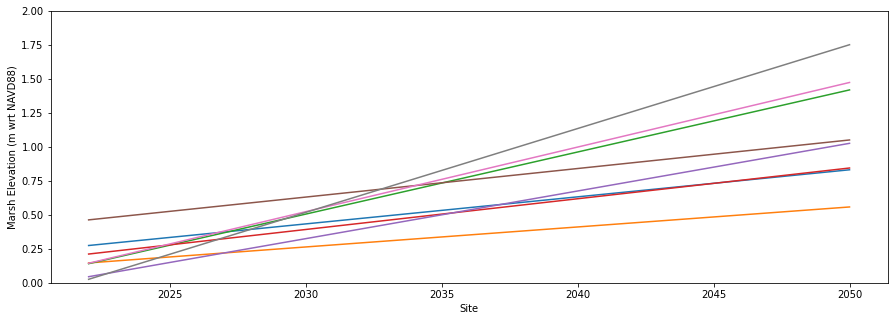

In [117]:
fig, ax= plt.subplots(figsize=(15,5))
for site in accretion['site_id']:
  plt.plot(time_series['years'],time_series[site])
  
ax.set(xlabel='Site', ylabel='Marsh Elevation (m wrt NAVD88)',ylim=[0,2])

plt.plot()

In [125]:

((25/12)*0.3048)/34

2*.3048*1000/35


17.417142857142856

Sea level in coastal Louisiana is expected to rise by 1.5-2 ft by 2050 (0.45 - 0.6m) or ~17mm/year. Based on these estimations, these marshes could keep up with sea level rise, though more complex analyses is needed to model these processes.